# Step-by-step simulation

In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

## Simple step response

In [2]:
# Plant
num1 = [1]
den1 = [1,7,12,0]
G = ct.tf(num1, den1)

# Controller
Kp= 50.4
Ti = 0.9069
Td = 0.2267
Gc = ct.tf([Kp*Ti*Td, Kp*Ti, Kp],[Ti, 0])


# Closed-loop system
sys = ct.feedback(Gc*G)

print('Plant:', G)

Plant: 
        1
------------------
s^3 + 7 s^2 + 12 s



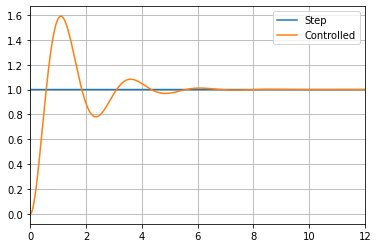

In [3]:
# Step
tsim = 12
dt = 0.005

t = np.arange(0, tsim, dt)
R = np.ones(len(t))
plt.plot(t, R, label = "Step")

# Controlled system
t1, C1 = ct.forced_response(sys,t,R)
plt.plot(t1, C1, label = "Controlled");

plt.legend()
plt.xlim((0,tsim))
#plt.ylim((0,1.6))
plt.grid()

## Step-by-step simulation of transfer functions

In [4]:
# Conver to space states to allow initial conditions
Gss = ct.tf2ss(G)

# Initial conditions
xPre = np.zeros(len(G.pole()))

# Accumulated system response
C2 = np.zeros(len(t))

# Instantaneus control signal
Ui = np.zeros(len(t))

# Accumulated integral signal
IAcc = np.zeros(len(t))

# Initialization of the integral signal and the error
I = 0
ePre = 0


for i, ti in enumerate(t):
    # Error
    e = R[i-1] - C2[i-1]
    
    # Controller
    P = Kp*e
    I = I + (Kp*e*dt)/Ti
    D = Kp*Td*(e - ePre)/dt
    U = P + I + D
    Ui[i] = U
    
    # PLant response
    _, Ci, Xi = ct.forced_response(Gss, [ti-dt,ti], [U,U], X0 = xPre, return_x = True)
    
    # Save results
    C2[i] = np.squeeze(Ci[-1])
    xPre = np.squeeze(Xi[:,-1])
    ePre = e
    IAcc[i] = I


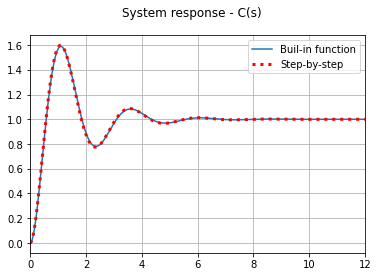

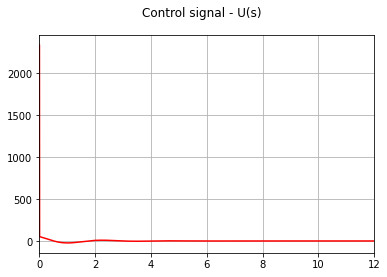

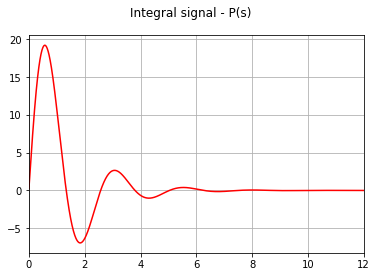

In [5]:
# Compare
plt.plot(t1, C1, label = "Buil-in function" )
plt.plot(t, C2, 'r:',linewidth = 3, label = "Step-by-step")
plt.xlim((0,tsim))
plt.suptitle("System response - C(s)")
plt.legend()
plt.grid()

#Controller
plt.figure()
plt.plot(t,Ui,'r');
plt.xlim((0,tsim))
plt.suptitle("Control signal - U(s)")
plt.grid()

# Integral part
plt.figure()
plt.plot(t,IAcc,'r');
plt.xlim((0,tsim))
plt.suptitle("Integral signal - P(s)")
plt.suptitle("Integral signal - P(s)")
plt.grid()